# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Шаг 2:

In [6]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверяем количество пропусков в каждом столбце

In [7]:
data.duplicated().sum()

0

Проверяем на количество явных дубликатов, в нашем случае их нет, если бы были, то мы просто удалили бы их

In [8]:
balcony = data.groupby('airports_nearest')['balcony'].median().dropna()
data['balcony'] = data['balcony'].fillna(balcony)
balcony = data.groupby('cityCenters_nearest')['balcony'].median().dropna()
data['balcony'] = data['balcony'].fillna(balcony)
balcony = data.groupby('parks_nearest')['balcony'].median().dropna()
data['balcony'] = data['balcony'].fillna(balcony)
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Если количество балконов не указано, предположим что их нет, то есть их количство равно 0.

<div class="alert alert-danger">
<font size="3"><b>❌ Почему?</b></font>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Исправил, сгруппировал по отдаленности по трем основным характеристикам, и заполнил по ним, остальное заполнил нулями, так как сть деревни в списке, там стоят в осномном стоят частные дома, и в них редко бывают балконы

In [9]:
data.loc[data['ceiling_height'] > 11, 'ceiling_height'] /= 10

In [10]:
data['ceiling_height'].loc[(data['ceiling_height'] > 4) & (data['total_area'] < 100)] = data['ceiling_height'].median()

C:\Users\ArchI\AppData\Local\Temp\ipykernel_4968\2168332291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'].loc[(data['ceiling_height'] > 4) & (data['total_area'] < 100)] = data['ceiling_height'].median()


In [11]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5

<Axes: >

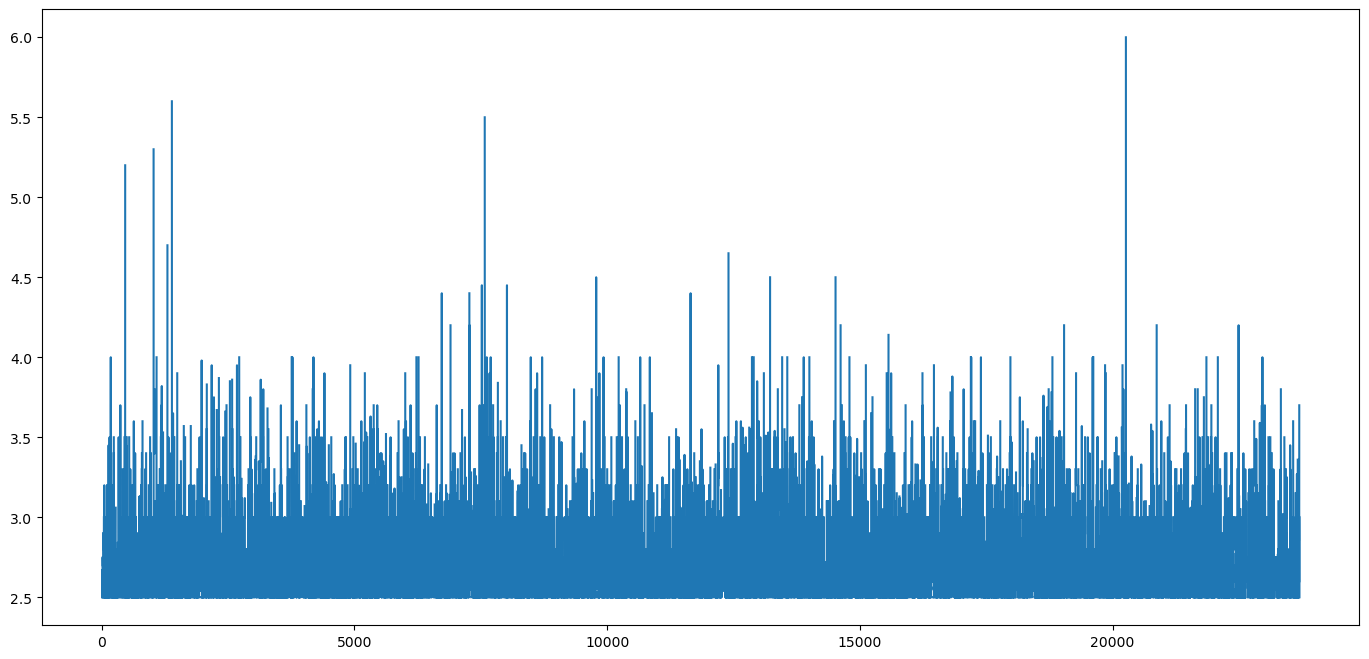

In [12]:
data['ceiling_height'].plot(figsize=(17,8))

<div class="alert alert-danger">
<font size="3"><b>❌ непонятно, исправить</b></font>  исправил

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Исправил

In [13]:
data['ceiling_height'].loc[data['ceiling_height'] > 6]

Series([], Name: ceiling_height, dtype: float64)

<div class="alert alert-danger">
<font size="3"><b>❌ Неправильная высота потолков</b></font> Теперь нормальные

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Теперь норм

При переносе данных или заполнении некоторые значения по высоте потолков были неверными, скорее всего забили точку при заполнении и получилось, что высота потолков стала в 10 раз больше. Мы делим числовое знаечение на 10, чтобы данные были более достоверными. Так же увеличиваем занчения высоты потолков до минимального допустимого 2.5 метра.

In [14]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].fillna('неизвестно')

Переводим все названия в нижний регистр, чтобы исключить самые простые неявные повотрения в названии места. Так же остальные заполняем неизвестным, так как нет данных, на которых можно было бы основываться для заполнения данных по месту.

In [15]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724566,10.673824,34.457852,5.892358,10.569807,0.723575,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.268751,6.597173,22.030445,4.885249,5.905438,0.992506,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,6.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [16]:
apartament_adress = data['cityCenters_nearest'].loc[data['is_apartment'] == True]
apartament_adress = data['parks_nearest'].loc[data['is_apartment'] == True]
apartament_adress = data['ponds_nearest'].loc[data['is_apartment'] == True]
data['is_apartment'] = data['is_apartment'].fillna(apartament_adress)
data['is_apartment'] = data['is_apartment'].fillna(False)

Заменяем все пропуске в столбце is_apartment на False, подразумевает, что если не указано, то объект не является аппартаментом.

<div class="alert alert-danger">
<font size="3"><b>❌ может адреса надо проверить перед тем как ставить FALSE</b></font>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Исправил, сгруппировал по отдаленности по трем основным характеристикам, и заполнил по ним, остальное заполнил False

In [17]:
#data['locality_name'].unique()

In [18]:
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('городской ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('станции ', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной ', '')

Убираем из названий тип поселения, чтобы оставались только названия и по ним могли уже анализировать и тем самым подчищаем дубликаты, так же меняем все "ё" на "е".

In [19]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,2,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,2,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1,парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.90,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [20]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [21]:
data.query('studio == True')['kitchen_area'].isnull().sum()

149

In [22]:
#data['kitchen_area'].loc[data['studio'] == True] = data['kitchen_area'].fillna(0)

<div class="alert alert-danger">
<font size="3"><b>❌ це бред</b></font>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Согласен, херня, так нельзя считать, дальше считаю по другому

Заполню все пропуски данных по кухням в квартирах студиях нулями, так как из-за планитровки фактически кухни нет, она совмещена с комнатой.

In [23]:
data['kitchen_area'].isnull().sum()

2278

In [24]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,...,NaN,2,мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,...,NaN,0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,...,NaN,2,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,...,NaN,1,парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,...,NaN,1,шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,...,NaN,0,санкт-петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,False,...,NaN,2,мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,...,NaN,0,санкт-петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,False,...,NaN,2,никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [25]:
kitchen_share = data['kitchen_area']/data['total_area']
kitchen_share.median()

0.1724137931034483

Из выборки мы посчитали что в среднем доля кухни от общей площади квартиры в среднем составляет 17%, предлагаю взять это число как референс и заполнить данные по площади кухни основываясь на этих данных.

In [26]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / kitchen_share.median())

Пропуски по площади кухни заполнили.

In [27]:
living_share = data['living_area']/data['total_area']
living_share.median()

0.5678598992678503

Аналогично как для кухни я посчитал долю жилой площади от общей площади кв, и заполню аналогично.

In [28]:
data['living_area'] = data['living_area'].fillna(data['total_area'] / living_share.median())

In [29]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [30]:
center_ceiling_height = data['ceiling_height'].loc[data['cityCenters_nearest'] < 5500]
data['ceiling_height'].loc[data['cityCenters_nearest'] < 5500] = data['ceiling_height'].fillna(center_ceiling_height.median())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

C:\Users\ArchI\AppData\Local\Temp\ipykernel_4968\3829689870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'].loc[data['cityCenters_nearest'] < 5500] = data['ceiling_height'].fillna(center_ceiling_height.median())


В центре историческая застройка, там потолки обычно выше чем в новых домах, поэтому я для центра нашел медиану высоту потолков и заполним этими значениями, а для остальных домов нашел медиану высоты потолков по всему датафрейму.

In [101]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest           24
cityCenters_nearest         0
parks_around3000            0
parks_nearest           10102
ponds_around3000            0
ponds_nearest            9070
days_exposition          2315
price_per_one               0
month                       0
day                         0
year                        0
floor_category              0
cityCenterDistance          0
monthstr                    0
dtype: int64

In [100]:
center_spb_floors = data['floors_total'].loc[(data['cityCenters_nearest'] < 5500) & ('locality_name' == 'cанкт-петербург')]
data['floors_total'].loc[(data['cityCenters_nearest'] < 5500) & ('locality_name' == 'cанкт-петербург')] = data['floors_total'].fillna(center_spb_floors)
data_grouped = data.groupby('locality_name')['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(data_grouped)
#data['floors_total'] = data['floors_total'].fillna(-1)

C:\Users\ArchI\AppData\Local\Temp\ipykernel_4968\1899479066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_total'].loc[(data['cityCenters_nearest'] < 5500) & ('locality_name' == 'cанкт-петербург')] = data['floors_total'].fillna(center_spb_floors)


Не вижу на основании чего можно было бы заполнить пропуски количестве этажей, поэтому прсто поставлю -1 для удобства

<div class="alert alert-danger">
<font size="3"><b>❌ поищи основания для заполнения</b></font>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Вроде сделал

In [33]:
airports_nearest = data.groupby('locality_name')['airports_nearest'].median().dropna()
data['airports_nearest'] = data['airports_nearest'].fillna(airports_nearest)

In [34]:
airports_nearest = data.groupby('locality_name')['cityCenters_nearest'].median().dropna()
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(airports_nearest)

In [35]:
airports_nearest = data.groupby('locality_name')['parks_nearest'].median().dropna()
data['parks_nearest'] = data['parks_nearest'].fillna(airports_nearest)

In [36]:
airports_nearest = data.groupby('locality_name')['ponds_nearest'].median().dropna()
data['ponds_nearest'] = data['ponds_nearest'].fillna(airports_nearest)

In [37]:
airports_nearest = data.groupby('locality_name')['parks_around3000'].median().dropna()
data['parks_around3000'] = data['parks_around3000'].fillna(airports_nearest)

In [38]:
airports_nearest = data.groupby('locality_name')['ponds_around3000'].median().dropna()
data['ponds_around3000'] = data['ponds_around3000'].fillna(airports_nearest)

Нахожу медианное значение отдаленности от аэропорта по населенным пунктам и и заполняю этим пропускиЮ для следующих пропушенных значнеие сделаю то же самое. Недостающие данные спарсить с API яндекса.

Шаг 3:

In [39]:
data['price_per_one'] = data['last_price'] / data['total_area']

Цена за квадратный метр

In [40]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

Месяц публикации объявления

In [41]:
data['day'] = data['first_day_exposition'].dt.dayofweek

День публикации объявления в числовом эквиваленте, 0 — понедельник, 1 — вторник и так далее);

<div class="alert alert-danger">
<font size="3"><b>❌ Не забудь рассказать не програмистам что такое нулевой день</b></font>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black"> я по заданию сделал, 0 — понедельник, 1 — вторник и так далее);

In [42]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Год публикации объявления

In [43]:
def what_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_category'] = data.apply(what_floor, axis=1)

Тип этажа

In [44]:
data.dropna(subset=['cityCenters_nearest'],inplace = True,axis = 0 )
data['cityCenterDistance'] = data['cityCenters_nearest'] /1000
data['cityCenterDistance'].astype('int')

0        16
1        18
2        13
3         6
4         8
         ..
23690     6
23691     4
23693    34
23694     4
23697    10
Name: cityCenterDistance, Length: 18180, dtype: int32

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18180 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18180 non-null  int64         
 1   last_price            18180 non-null  float64       
 2   total_area            18180 non-null  float64       
 3   first_day_exposition  18180 non-null  datetime64[ns]
 4   rooms                 18180 non-null  int64         
 5   ceiling_height        18180 non-null  float64       
 6   floors_total          18180 non-null  float64       
 7   living_area           18180 non-null  float64       
 8   floor                 18180 non-null  int64         
 9   is_apartment          18180 non-null  bool          
 10  studio                18180 non-null  bool          
 11  open_plan             18180 non-null  bool          
 12  kitchen_area          18180 non-null  float64       
 13  balcony         

Расстояние до центра города в КМ

Шаг 4

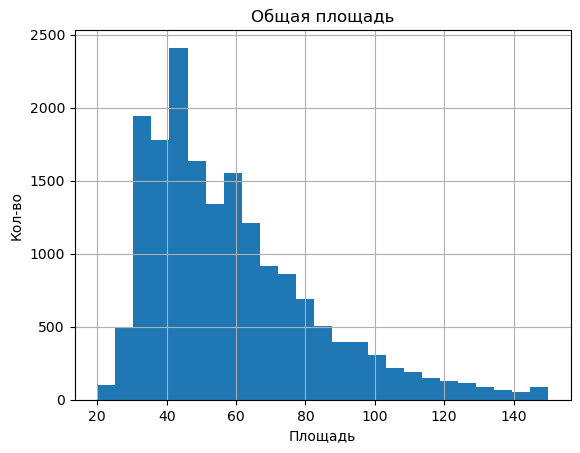

In [46]:
ax = data['total_area'].plot(kind='hist', bins=25, range=(20,150), title='Общая площадь', grid=True)
ax.set_xlabel('Площадь')
ax.set_ylabel('Кол-во');

Больше всего квартир с площадью около 45м2, похоже на правду

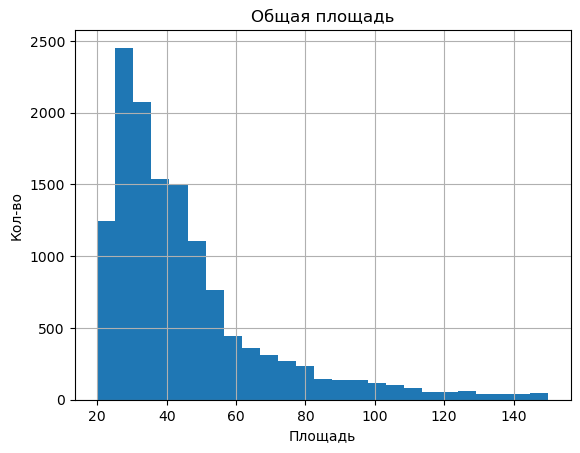

In [47]:
ax = data['living_area'].plot(kind='hist', bins=25, range=(20,150), title='Общая площадь', grid=True)
ax.set_xlabel('Площадь')
ax.set_ylabel('Кол-во');

Пики плюс минус совпадают совпадают для небольших по алощади квартир

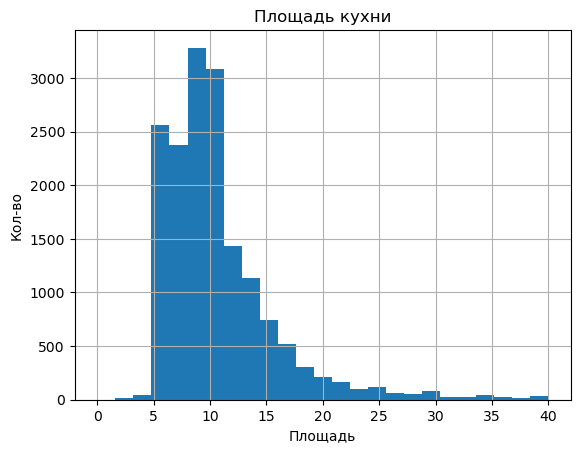

In [48]:
ax = data['kitchen_area'].plot(kind='hist', bins=25, range=(0,40), title='Площадь кухни', grid=True)
ax.set_xlabel('Площадь')
ax.set_ylabel('Кол-во');

Тоже ничего аномального не заметил, для небольших квартир характерна небольшая кухня

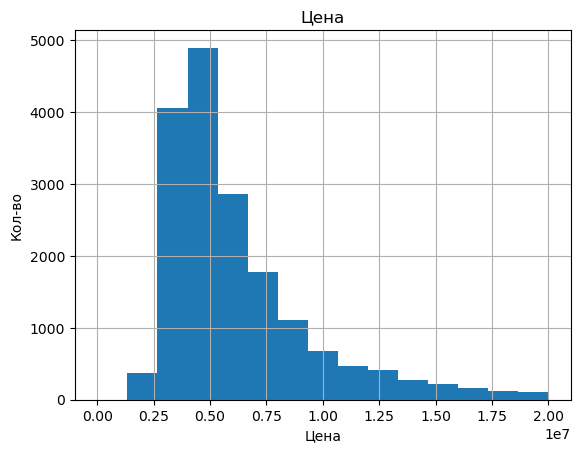

In [49]:
ax = data['last_price'].plot(kind='hist', bins=15, range=(0,20000000), title='Цена', grid=True)
ax.set_xlabel('Цена')
ax.set_ylabel('Кол-во');

Больше всего квартир продается от 2 до 8 миллионов

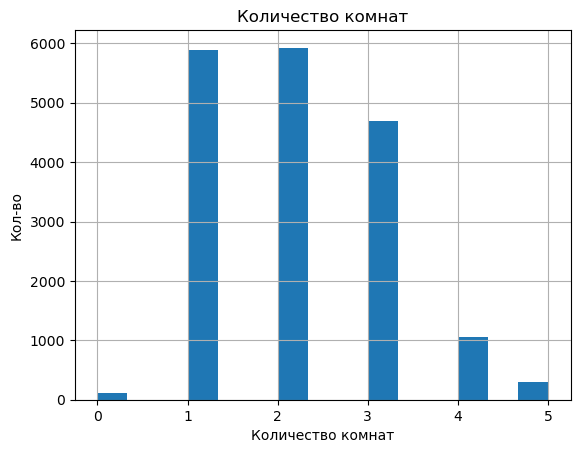

In [50]:
ax = data['rooms'].plot(kind='hist', bins=15, range=(0,5), title='Количество комнат', grid=True)
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Кол-во');

Больше всего однушек и двушек, трешек не категорически меньше

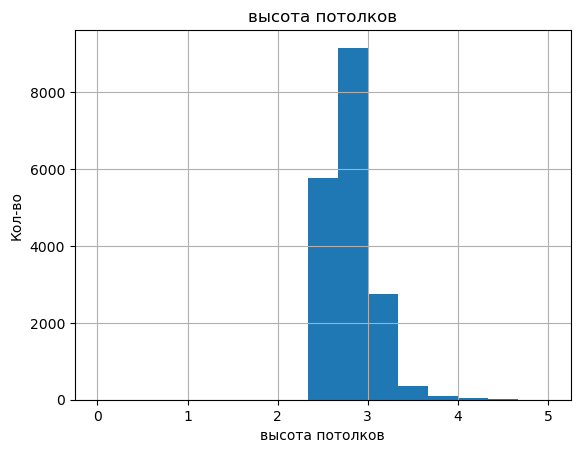

In [51]:
ax = data['ceiling_height'].plot(kind='hist', bins=15, range=(0,5), title='высота потолков', grid=True)
ax.set_xlabel('высота потолков')
ax.set_ylabel('Кол-во');

У большинства квыартир стандартная высота потолков, около 3м 

ax = data['floor'].plot(kind='hist', bins=15, range=(0,30), title='этаж квартиры', grid=True)
ax.set_xlabel('Цена')
ax.set_ylabel('Кол-во');

Чаще всего квартиру продают на 4-6 этаже(самый оптимальный для жизни согласно исследованиям)

https://www.m24.ru/news/obshchestvo/03032023/555575

<div class="alert alert-danger">
<font size="3"><b>❌ приложи ссылку</b></font>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Приложил

<Axes: >

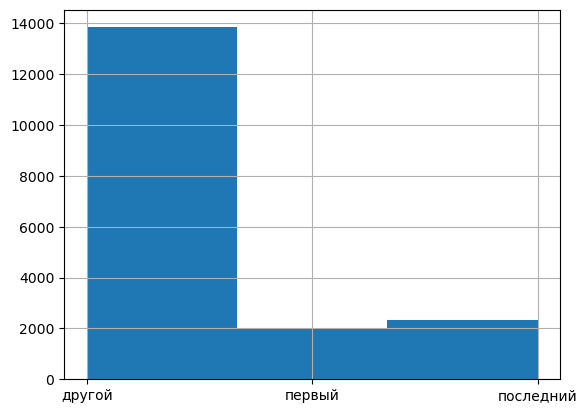

In [52]:
data['floor_category'].hist(bins=3)

Ничего особенного, больше всего квартир на не первом и не последнем этаже

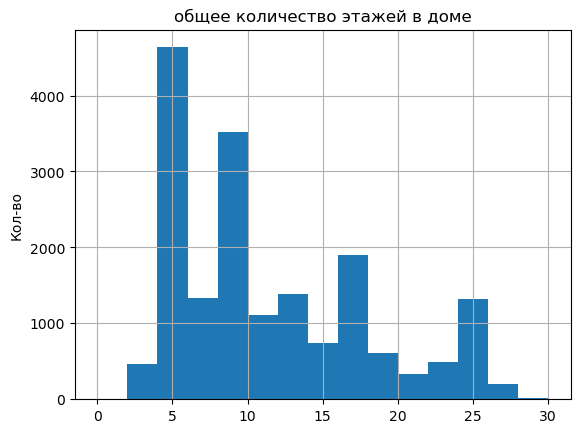

In [53]:
ax = data['floors_total'].plot(kind='hist', bins=15, range=(0,30), title='общее количество этажей в доме', grid=True)
ax.set_ylabel('Кол-во');

очень много хрущевок и девятиэтажек, похоже на советскую застройку, и застрйоку 90-00

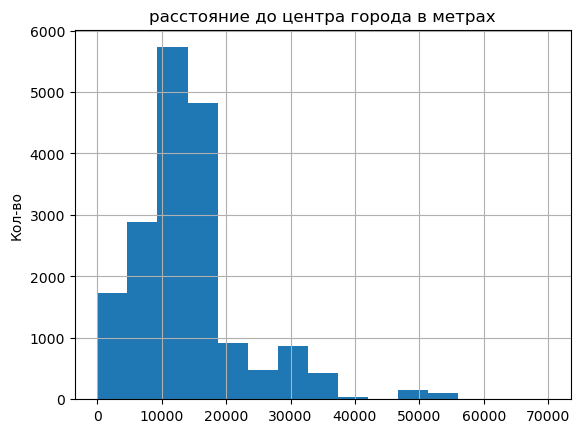

In [54]:
ax = data['cityCenters_nearest'].plot(kind='hist', bins=15, range=(0,70000), title='расстояние до центра города в метрах', grid=True)
ax.set_ylabel('Кол-во');

большая часть квартир в отдаленности от 10 до 20 км от центра города, либо в его черте, либо в ближайшем пригороде

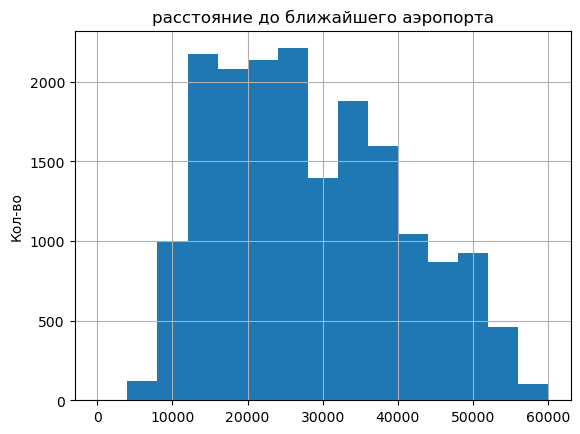

In [55]:
ax = data['airports_nearest'].plot(kind='hist', bins=15, range=(0,60000), title='расстояние до ближайшего аэропорта', grid=True)
ax.set_ylabel('Кол-во');

Аэропорт недалеко от города

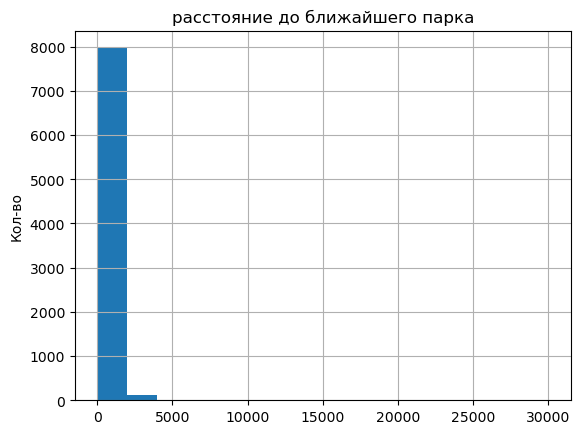

In [56]:
ax = data['parks_nearest'].plot(kind='hist', bins=15, range=(0,30000), title='расстояние до ближайшего парка', grid=True)
ax.set_ylabel('Кол-во');

Парков в Питере не мало, но до них все равно придется добираться

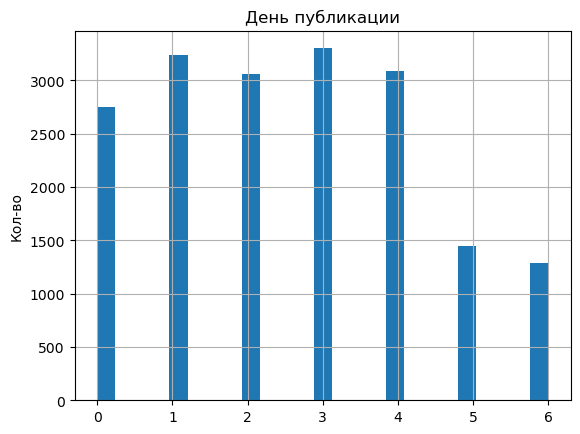

In [57]:
ax = data['day'].plot(kind='hist', bins=25, range=(0,6), title='День публикации', grid=True)
ax.set_ylabel('Кол-во');

больше всего публикуется во вторник и четверг

In [58]:
data['monthstr'] = pd.DatetimeIndex(data['first_day_exposition']).strftime('%B')

In [59]:
data['monthstr']

0           March
1        December
2          August
3            July
4            June
           ...   
23690        July
23691     October
23693      August
23694       March
23697       March
Name: monthstr, Length: 18180, dtype: object

Text(0, 0.5, 'месяц публикации')

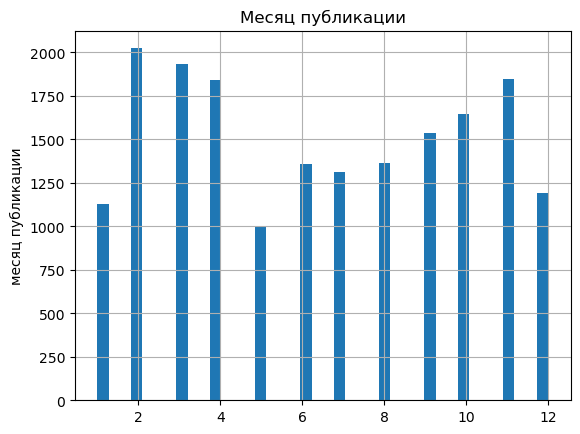

In [60]:
# x = f'data["monthstr"]'
# y = 
ax = data["month"].plot(kind='hist', bins=40, range=(1,12), title='Месяц публикации', grid=True)
ax.set_ylabel('Кол-во');
ax.set_ylabel('месяц публикации')

Больше всего объявлений публикуется весной и осенью, летом и зимойц реже

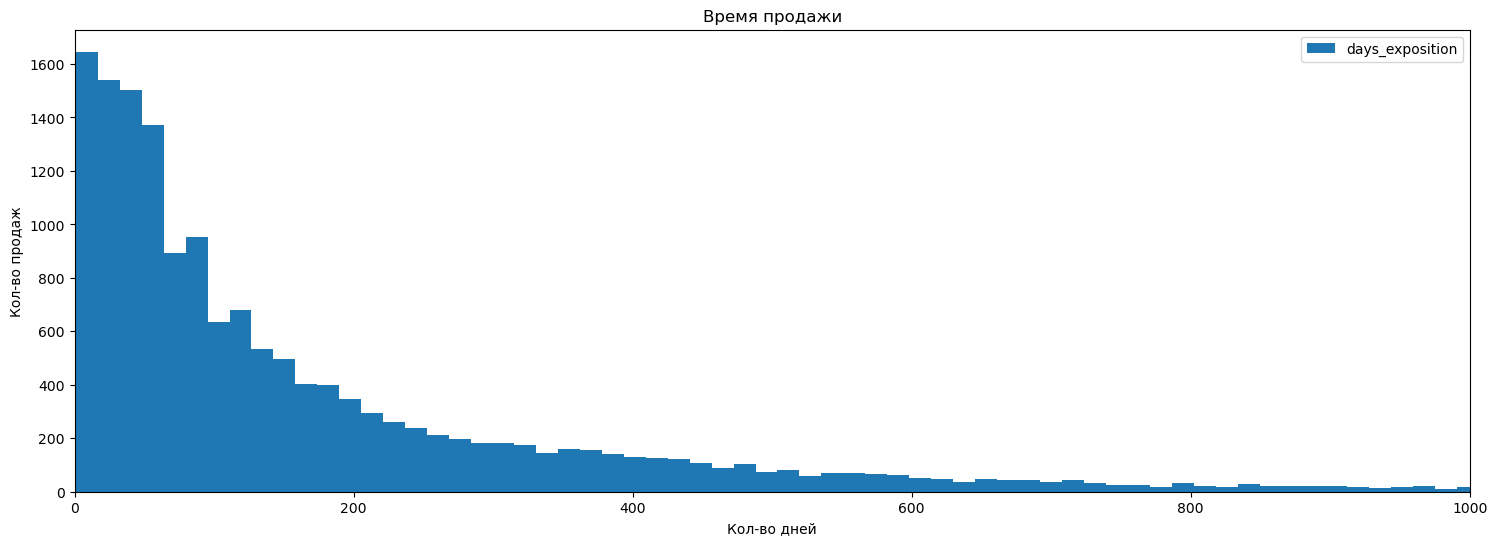

In [61]:
ax = data.plot(y='days_exposition', kind='hist', bins=100, figsize=(18,6), xlim=(0,1000), title='Время продажи')
ax.set_xlabel('Кол-во дней');
ax.set_ylabel('Кол-во продаж');

<div class="alert alert-danger">
<font size="3"><b>❌ херня какая-то</b></font>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Исправил

In [62]:
print('Медианное время продажи:',data['days_exposition'].median())
print('Среднее время продажи:',data['days_exposition'].mean())

Медианное время продажи: 96.0
Среднее время продажи: 182.6323983611724


Медианное и среднее значение отличается почтив 2 раза, думаю это связано с выбросами, ограничу продажу 400 днями

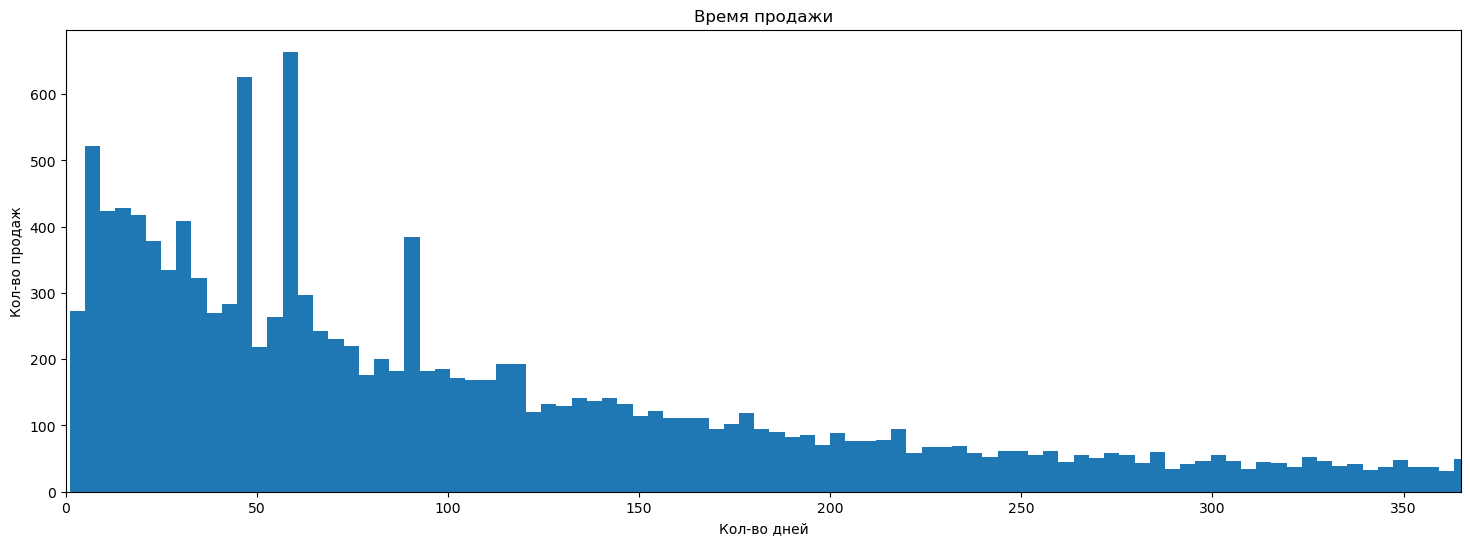

In [63]:
good_days_exposition_data = data.query('days_exposition<400')['days_exposition']
ax = good_days_exposition_data.plot(y='days_exposition', kind='hist', bins=100, figsize=(18,6), xlim=(0,365), title='Время продажи')
ax.set_xlabel('Кол-во дней');
ax.set_ylabel('Кол-во продаж');

<div class="alert alert-danger">
<font size="3"><b>❌ аналогично</b></font>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Исправил

Здесь уже выглядит правдоподобнее, но есть ощущение что не все люди сами снимали объявление, а просто ждали конца его срока на площадке, так как слишком много отключений в один день.

In [64]:
good_days_exposition_data.value_counts().head(20)

60.0    465
45.0    428
90.0    189
30.0    187
7.0     184
4.0     140
14.0    131
3.0     129
5.0     125
9.0     120
20.0    116
8.0     115
11.0    111
13.0    108
19.0    107
15.0    106
10.0    104
28.0    103
18.0    102
22.0     99
Name: days_exposition, dtype: int64

Если обьявления автоматически снимаются раз в 15 дней, если их не продлили, то мой вывод похож на правду.

По статистике я бы считал продажи менее чем за месяц быстрыми, а вот от 4 месяцев долгими.

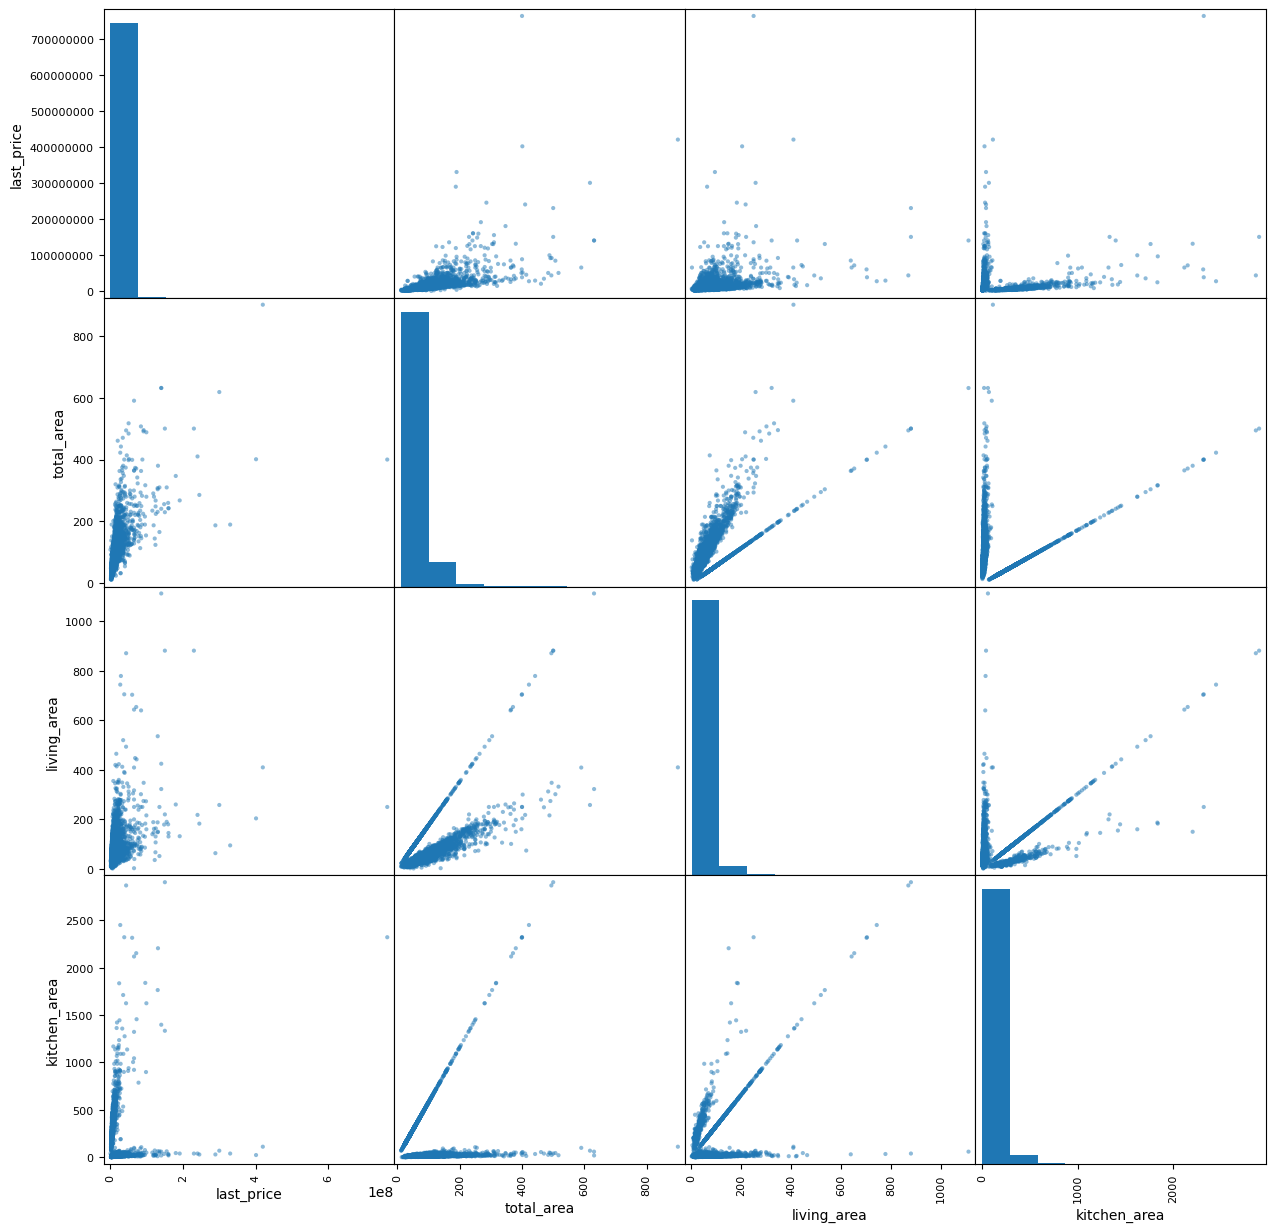

In [65]:
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'living_area', 'kitchen_area']],figsize=(15,15));

In [66]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area']].corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.652196,0.463563,0.211817
total_area,0.652196,1.000000,0.742586,0.232262
living_area,0.463563,0.742586,1.000000,0.587724
kitchen_area,0.211817,0.232262,0.587724,1.000000


Как и ожидалось на самое большое влияние на конечную стоимость квартиры оказывает ее общая площадь

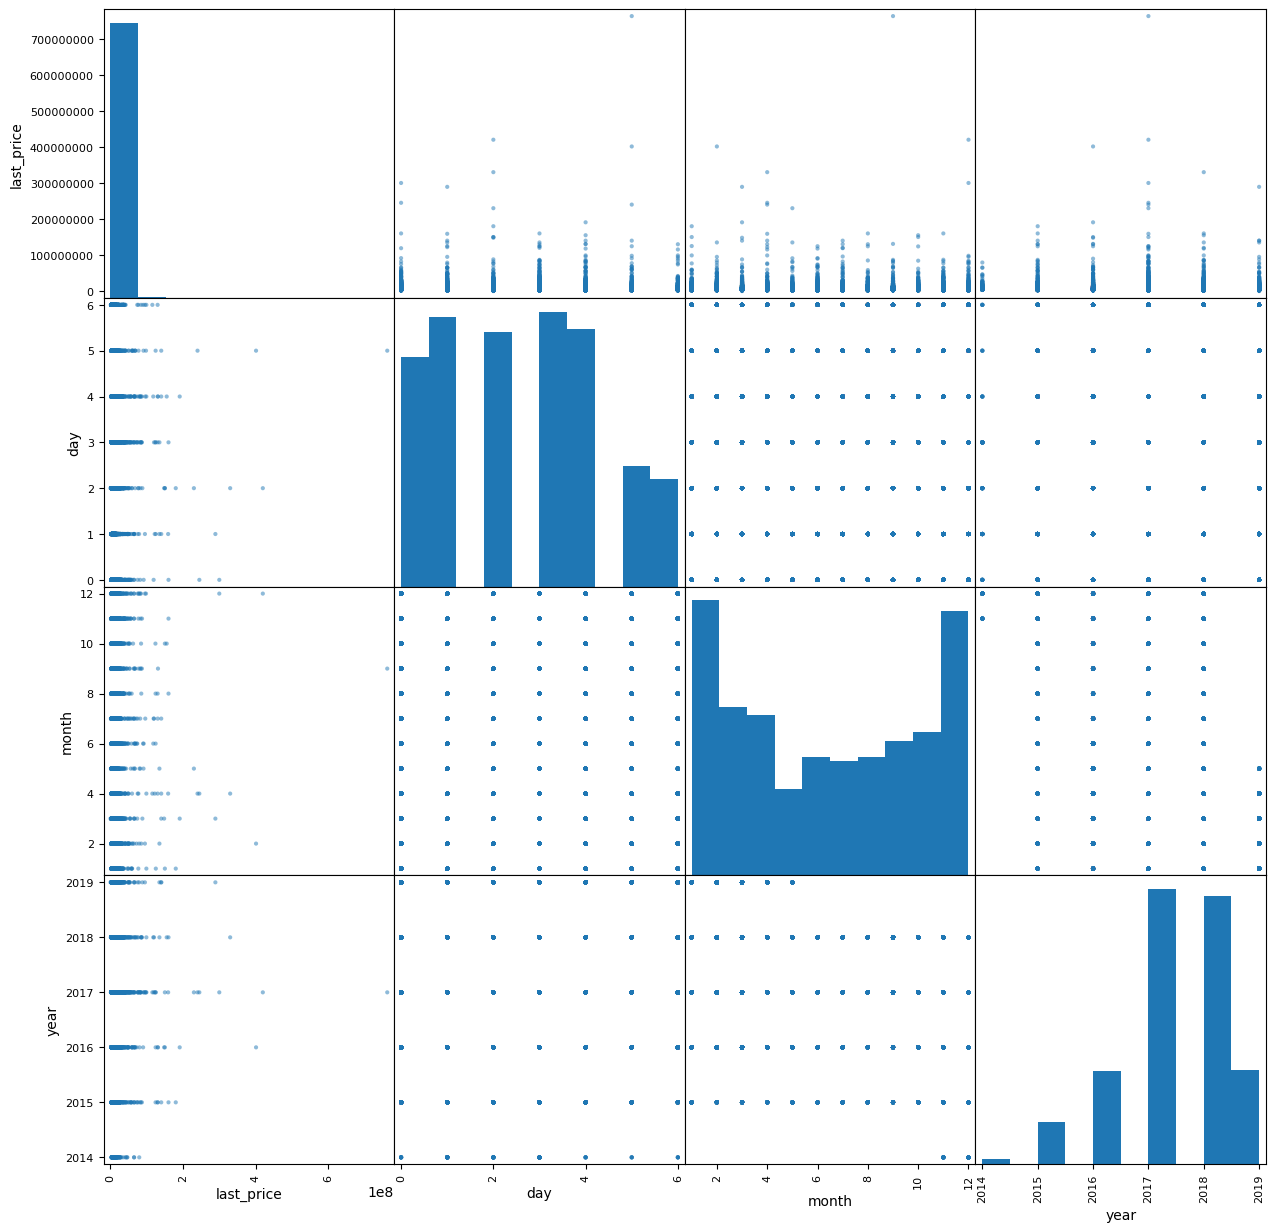

In [67]:
pd.plotting.scatter_matrix(data[['last_price', 'day', 'month', 'year']],figsize=(15,15));

In [68]:
data[['last_price','floor', 'day', 'month', 'year']].corr()

,last_price,floor,day,month,year
last_price,1.000000,0.003106,0.004641,0.001703,-0.042027
floor,0.003106,1.000000,0.014772,0.012083,0.014743
day,0.004641,0.014772,1.000000,0.006815,-0.005222
month,0.001703,0.012083,0.006815,1.000000,-0.271921
year,-0.042027,0.014743,-0.005222,-0.271921,1.000000


Больше всего квартир было продано в 18-19 годах
Зимой спад в продажах
По дням особо разницы нет, но как будто люди предпочитают заниматься такими вопросами в будни, возможно это связано с неработой некоторых банков через которые проходят операции, либо же с нежеланием людей заниматься рабочими и финансовыми вопросами по выходным

<div class="alert alert-danger">
<font size="3"><b>❌ Обоснования будут?</b></font>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Исправил

In [69]:
top_locals = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index.values.tolist()
data_top_locals = data.query('locality_name in @top_locals')
data_top_locals.groupby('locality_name')['price_per_one'].mean().sort_values(ascending=False).astype('int')

locality_name
санкт-петербург    114687
пушкин             103070
сестрорецк         101757
парголово           90175
петергоф            84757
кронштадт           79380
шушары              78474
колпино             75402
ломоносов           72609
красное село        72009
Name: price_per_one, dtype: int32

In [70]:
data_top_locals

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_one,month,day,year,floor_category,cityCenterDistance,monthstr
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.028,March
1,7,3350000.0,40.40,2018-12-04,1,2.67,11.0,18.600000,1,False,...,0.0,NaN,81.0,82920.792079,12,1,2018,первый,18.603,December
2,10,5196000.0,56.00,2015-08-20,2,2.67,5.0,34.300000,4,False,...,2.0,574.0,558.0,92785.714286,8,3,2015,другой,13.933,August
3,0,64900000.0,159.00,2015-07-24,3,2.67,14.0,279.998641,9,False,...,3.0,234.0,424.0,408176.100629,7,4,2015,другой,6.800,July
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000.000000,6,1,2018,другой,8.098,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.00,2018-07-19,2,2.67,5.0,31.000000,2,False,...,0.0,NaN,15.0,105769.230769,7,3,2018,другой,6.263,July
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,1.0,806.0,519.0,129903.978052,10,3,2016,другой,4.489,October
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.000000,8,False,...,1.0,675.0,239.0,73717.948718,8,4,2016,другой,34.104,August
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,3.0,381.0,NaN,72490.845228,3,1,2017,другой,4.232,March


In [71]:
(
    data
    .groupby('locality_name')['price_per_one']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).style.format("{:,.0f}")

,count,mean
locality_name,,
санкт-петербург,"15,660","114,688"
пушкин,368,"103,070"
сестрорецк,183,"101,758"
парголово,327,"90,176"
петергоф,201,"84,758"
кронштадт,95,"79,380"
шушары,436,"78,474"
колпино,337,"75,403"
ломоносов,132,"72,610"


Ожидавемо самые дорогие квартиры в Питере, и чем дальше от питера, тем дешевле, приближенность к аэропорту тоже сбавляет стоимость жилья.

In [72]:
m2_from_center = data.groupby(['cityCenterDistance'])['price_per_one'].median()
m2_from_center = m2_from_center.to_frame()
m2_from_center['cityCenterDistance'] = m2_from_center.index
m2_from_center.head(25)

,price_per_one,cityCenterDistance
cityCenterDistance,,
0.181,195591.194969,0.181
0.208,172619.047619,0.208
0.215,109900.000000,0.215
0.287,88796.296296,0.287
0.291,101321.585903,0.291
0.318,454375.000000,0.318
0.329,100000.000000,0.329
0.376,137755.102041,0.376
0.387,139318.885449,0.387


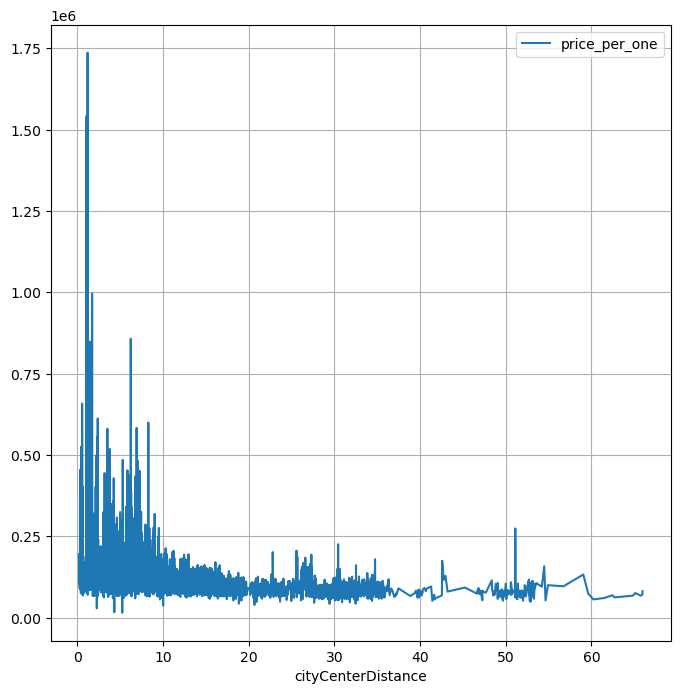

In [73]:
m2_from_center.plot(x='cityCenterDistance', y='price_per_one', grid=True, figsize=(8,8));

Близость к ццентру влияет только до 8 км, а далее не таккритично, считаю что это связано с широким разбросом достопремичательностей и центров активности плюс минус равномерно по всему питеру

<div class="alert alert-danger">
<font size="3"><b>❌ Статистика по цене за квадрат, и по цене за квадрат по городам и по комнатности</b></font>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Ответ</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Вроде сделал

In [93]:
top_locals = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(4).index.values.tolist()
data_top_locals = data.query('locality_name in @top_locals')

In [102]:
#data_top_locals

| пункт/комнаты  | 1  | 2 | 3 |
|:------------- |:---------------:| -------------:| -------------:|
|Санкт-петербург|122649.5|103631.6|97087.3|
|Пушкин|101825.9|75342.4|67469.8|
|Шушары|110738.2|75342.4|67469.8|
|Колпино|82758.6|75000|68050.2|

Шаг 5:

1. Среднее время продажи квартиры около 3 месяцев
2. На стоимость квартиры больше всего вляет его общая площадь
3. центром можно считать 8км
4. отдаленность от центра понижает стоимость квартиры.
5. А вот в центре отдаелленость почти не влияет на стоиомсть квартиры.
6. самые догоие квартиры в Питере
7. В декабре и явваре квартиры продаются дольше и дешевле
8. больше всего на рынеке однушек и двушек, трешек немного меньше
9. Люди не снимают объявления вручную. а просто ждут конца срока размещения.
10. При продаже квартиры в любом другом городе, даже в ближайших от питера, цена за квадратный метр резко падает примерно на 20%
11. Цены за квадратный метр в городах возле питера за 2-х и 3-х контатные квартиры почти не отличается.